In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
# Dropping identification columns
df = df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [21]:
# Dropping empty rows
df = df.dropna()

In [22]:
# Categorical to numeric
df = df.replace(to_replace={'male':1,'female':-1,'Q':3,'S':2,'C':1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,3
1,1,3,-1,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,3
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,-1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
409,1,3,-1,3.0,1,1,13.7750,2
411,1,1,-1,37.0,1,0,90.0000,3
412,1,3,-1,28.0,0,0,7.7750,2
414,1,1,-1,39.0,0,0,108.9000,1


In [23]:
# Checking correlation values
df.corr()['Survived']

# Very high correlation with Sex

Survived    1.000000
Pclass     -0.117886
Sex        -1.000000
Age         0.005104
SibSp       0.075450
Parch       0.163710
Fare        0.192672
Embarked   -0.023178
Name: Survived, dtype: float64

In [29]:
# Checking higher correlations
independent = abs(df.corr()['Survived'][1:]).sort_values(ascending=False).head(3).index.to_list()
independent

['Sex', 'Fare', 'Parch']

In [30]:
# Normalizing
df = df/df.max()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.000000,1.0,0.453947,0.000,0.000000,0.015282,1.000000
1,1.0,1.000000,-1.0,0.618421,0.125,0.000000,0.013663,0.666667
2,0.0,0.666667,1.0,0.815789,0.000,0.000000,0.018909,1.000000
3,0.0,1.000000,1.0,0.355263,0.000,0.000000,0.016908,0.666667
4,1.0,1.000000,-1.0,0.289474,0.125,0.166667,0.023984,0.666667
...,...,...,...,...,...,...,...,...
409,1.0,1.000000,-1.0,0.039474,0.125,0.166667,0.026887,0.666667
411,1.0,0.333333,-1.0,0.486842,0.125,0.000000,0.175668,1.000000
412,1.0,1.000000,-1.0,0.368421,0.000,0.000000,0.015176,0.666667
414,1.0,0.333333,-1.0,0.513158,0.000,0.000000,0.212559,0.333333


In [31]:
print("Mean:",df['Fare'].mean(),"Std:",df['Fare'].std())
df['Fare'].loc[np.logical_or(df['Fare'] < df['Fare'].mean() - 2*df['Fare'].std(),df['Fare'] > df['Fare'].mean() + 2*df['Fare'].std())] = df['Fare'].median()
print("Mean:",df['Fare'].mean(),"Std:",df['Fare'].std())

Mean: 0.07999170711171302 Std: 0.11951018646906961
Mean: 0.053115704285424135 Std: 0.055780205363981976


In [32]:
print("Mean:",df['Age'].mean(),"Std:",df['Age'].std())
df['Age'].loc[np.logical_or(df['Age'] < df['Age'].mean() - 2*df['Age'].std(),df['Age'] > df['Age'].mean() + 2*df['Age'].std())] = df['Age'].median()
print("Mean:",df['Age'].mean(),"Std:",df['Age'].std())

Mean: 0.3971219589759899 Std: 0.18558648151054755
Mean: 0.3853553824137383 Std: 0.1505941709654302


In [33]:
# Splitting test train
from sklearn.model_selection import train_test_split

Y = df['Survived']
X = df[independent]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [42]:
# Training the model
theta = [0.5,0.5,0.5]
def hypothesis(theta, X):
    return theta*X
def Cost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(X))
def gradientDescent(X, y, theta, alpha, epoch):
    costs = []  
    k = 0
    while k < epoch:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        cost = Cost(X, y, theta)
        costs.append(cost)
        k += 1
    return costs, cost, theta
cost , c , theta = gradientDescent(X_train,y_train,theta,0.00005,30000)
c

0.1810778137900872

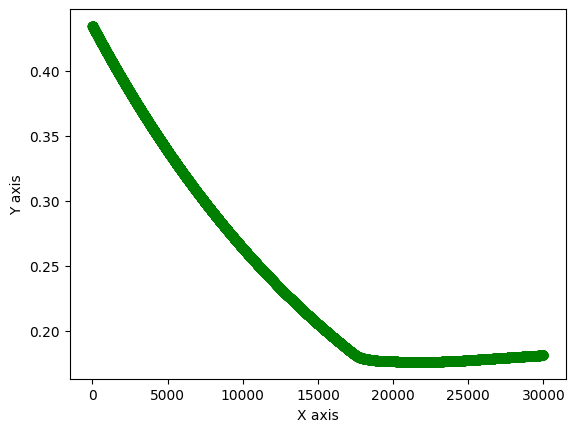

In [66]:
import matplotlib.pyplot as plt

plt.scatter(x=list(range(len(cost))), y = cost, color='green')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()
y_new = hypothesis(theta, X_test)
y_new = np.sum(y_new, axis=1)

In [70]:
# Numeric to categoric
def norm(x):
    nom = (x - x.min()) * 2.0
    denom = x.max() - x.min()
    return  nom/denom - 1.0

def sigmoid(x, k=0.1):
    s = 1 / (1 + np.exp(-x / k)) 
    return s

    
y_new = norm(y_new)
y_new = sigmoid(y_new)

val = []

for data in y_new:
    if data < 0.5:
        val.append(0)
    else:
        val.append(1)
y_new = pd.Series(val)
y_new

0     0
1     1
2     0
3     1
4     1
     ..
78    1
79    0
80    0
81    0
82    1
Length: 83, dtype: int64

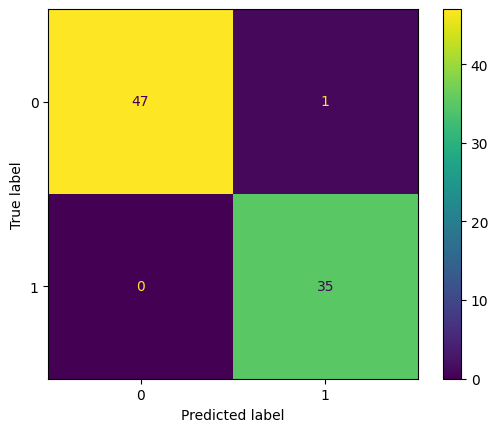

In [74]:
# Plotting confusion matrix
from sklearn import metrics

matrix = metrics.confusion_matrix(y_test, y_new)
metrics.ConfusionMatrixDisplay(matrix).plot()

In [76]:
# Accuracy score
print("accuracy score:",metrics.accuracy_score(y_test,y_new)*100)

accuracy score: 98.79518072289156


In [77]:
# Final coefficients
theta

[-0.17484201769942903, 0.5270330578433816, 0.5362668261550927]